#### 1

In [1]:
! pip install yfinance -q
! pip install yahoo_fin -q

     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 83 kB 1.3 MB/s 
     |████████████████████████████████| 140 kB 56.1 MB/s 
     |████████████████████████████████| 106 kB 53.1 MB/s 


In [2]:
! pip install git+https://github.com/quantopian/pyfolio -q

     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 49.2 MB/s 


### 모멘텀

dollar neutral한 것만 구현(sector neutral X)

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web

import pyfolio as pf
from pyfolio.plotting import plot_rolling_returns


from tqdm import tqdm
from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


In [6]:
constituents = pd.read_csv('constituents.csv')
tickers, names, sectors = constituents['Symbol'], constituents['Name'], constituents['Sector']

In [7]:
start, end ='2012-06-11', '2022-09-30'
price_df = pd.DataFrame()
for ticker in tqdm(tickers):
  temp = yf.Ticker(ticker)
  close = temp.history(start=start, end=end)['Close']
  price_df[ticker] = close

  8%|▊         | 42/505 [00:07<01:16,  6.07it/s]

Got error from yahoo api for ticker ANTM, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ANTM: No data found for this date range, symbol may be delisted


 12%|█▏        | 59/505 [00:10<01:27,  5.13it/s]

Got error from yahoo api for ticker BLL, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BLL: No data found for this date range, symbol may be delisted


 13%|█▎        | 66/505 [00:12<01:11,  6.17it/s]

Got error from yahoo api for ticker BRK.B, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BRK.B: No data found for this date range, symbol may be delisted


 16%|█▌        | 80/505 [00:14<01:20,  5.27it/s]

- BF.B: No data found for this date range, symbol may be delisted


 20%|██        | 101/505 [00:17<00:56,  7.09it/s]

Got error from yahoo api for ticker CERN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- CERN: No data found for this date range, symbol may be delisted


 30%|██▉       | 150/505 [00:27<00:47,  7.43it/s]

Got error from yahoo api for ticker DISCA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- DISCA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker DISCK, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- DISCK: No data found for this date range, symbol may be delisted


 38%|███▊      | 190/505 [00:36<01:14,  4.20it/s]

Got error from yahoo api for ticker FB, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- FB: No data found for this date range, symbol may be delisted


 48%|████▊     | 243/505 [00:46<00:51,  5.12it/s]

Got error from yahoo api for ticker INFO, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- INFO: No data found for this date range, symbol may be delisted


 53%|█████▎    | 267/505 [00:50<00:48,  4.91it/s]

Got error from yahoo api for ticker KSU, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- KSU: No data found for this date range, symbol may be delisted


 72%|███████▏  | 363/505 [01:08<00:25,  5.66it/s]

Got error from yahoo api for ticker PBCT, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PBCT: No data found for this date range, symbol may be delisted


 94%|█████████▍| 474/505 [01:29<00:05,  5.56it/s]

Got error from yahoo api for ticker VIAC, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- VIAC: No data found for this date range, symbol may be delisted


 98%|█████████▊| 497/505 [01:34<00:01,  6.26it/s]

Got error from yahoo api for ticker WLTW, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- WLTW: No data found for this date range, symbol may be delisted


 99%|█████████▉| 500/505 [01:34<00:00,  6.60it/s]

Got error from yahoo api for ticker XLNX, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- XLNX: No data found for this date range, symbol may be delisted


100%|██████████| 505/505 [01:35<00:00,  5.28it/s]


In [8]:
price_df.head()

MMM        AOS        ABT  ABBV       ABMD  \
Date                                                                          
2012-06-11 00:00:00-04:00  63.620712   9.994508  24.056084   NaN  21.190001   
2012-06-12 00:00:00-04:00  64.778397  10.153253  24.232075   NaN  21.450001   
2012-06-13 00:00:00-04:00  64.330276   9.990217  24.056084   NaN  20.950001   
2012-06-14 00:00:00-04:00  64.875496  10.211175  24.302465   NaN  21.420000   
2012-06-15 00:00:00-04:00  65.308716  10.256225  24.443258   NaN  22.150000   

                                 ACN       ATVI        ADM       ADBE  \
Date                                                                    
2012-06-11 00:00:00-04:00  47.122158  10.735266  23.997301  31.129999   
2012-06-12 00:00:00-04:00  47.220963  10.818556  24.179033  31.770000   
2012-06-13 00:00:00-04:00  46.875141  10.790794  23.671686  31.790001   
2012-06-14 00:00:00-04:00  47.624420  10.670483  23.671686  31.670000   
2012-06-15 00:00:00-04:00  48.645416  10.587192  23.815561  32.389999   

                                 AAP  ...  WLTW       WYNN        XEL  XLNX  \
Date                                  ...                                     
2012-06-11 00:00:00-04:00  67.725388  ...   NaN  75.379547  20.289818   NaN   
2012-06-12 00:00:00-04:00  68.832703  ...   NaN  76.848816  20.190392   NaN   
2012-06-13 00:00:00-04:00  66.195747  ...   NaN  75.886978  20.211695   NaN   
2012-06-14 00:00:00-04:00  66.308357  ...   NaN  76.106613  20.417650   NaN   
2012-06-15 00:00:00-04:00  65.445023  ...   NaN  75.379547  20.502869   NaN   

                                 XYL        YUM       ZBRA        ZBH  \
Date                                                                    
2012-06-11 00:00:00-04:00  22.196735  37.472458  32.340000  53.344921   
2012-06-12 00:00:00-04:00  22.257641  37.501980  32.650002  53.744862   
2012-06-13 00:00:00-04:00  21.900890  37.124004  32.410000  53.291584   
2012-06-14 00:00:00-04:00  21.752977  38.045319  32.200001  53.887070   
2012-06-15 00:00:00-04:00  22.031406  38.381947  32.290001  56.171249   

                                ZION  ZTS  
Date                                       
2012-06-11 00:00:00-04:00  14.866458  NaN  
2012-06-12 00:00:00-04:00  15.160095  NaN  
2012-06-13 00:00:00-04:00  15.025859  NaN  
2012-06-14 00:00:00-04:00  15.403396  NaN  
2012-06-15 00:00:00-04:00  15.688643  NaN  

[5 rows x 505 columns]

In [9]:
monthly_prices = price_df.resample('M').last()

In [10]:
monthly_prices = monthly_prices.loc[:, monthly_prices.isnull().mean() == 0]

In [11]:
# 결측치가 없는 것은 총 453개
monthly_prices.shape

(124, 453)

In [14]:
monthly_prices.to_csv('monthly_prices(US).csv')

In [17]:
monthly_prices = pd.read_csv('monthly_prices(US).csv')

In [18]:
monthly_prices['Date'] = list(map(lambda x: x.split()[0], monthly_prices.Date))

In [19]:
monthly_prices = monthly_prices.set_index('Date')
monthly_prices.index = monthly_prices.index.astype('datetime64[ns]')

In [20]:
monthly_prices

MMM        AOS         ABT        ABMD         ACN  \
Date                                                                    
2012-06-30   66.921982  10.487906   25.213720   22.820000   49.477036   
2012-07-31   68.139435  10.644428   26.136301   22.549999   49.649925   
2012-08-31   69.603256  11.783822   25.832809   22.330000   50.720337   
2012-09-30   69.467957  12.393370   27.023146   20.990000   57.661449   
2012-10-31   65.844994  13.132913   26.005510   19.820000   56.150238   
...                ...        ...         ...         ...         ...   
2022-05-31  147.773483  59.496037  116.391037  263.700012  296.085449   
2022-06-30  128.095428  54.112499  107.661217  247.509995  275.441010   
2022-07-31  141.784943  62.904278  108.328857  293.010010  304.904114   
2022-08-31  124.349998  56.123699  102.167931  259.279999  287.182892   
2022-09-30  112.300003  48.448322   97.828407  248.960007  257.126556   

                 ATVI        ADM        ADBE         AAP         AMD  ...  \
Date                                                                  ...   
2012-06-30  11.096191  22.354065   32.369999   64.074471    5.730000  ...   
2012-07-31  11.133209  19.756693   30.879999   65.887207    4.060000  ...   
2012-08-31  10.883337  20.394114   31.270000   66.798256    3.720000  ...   
2012-09-30  10.439120  20.721941   32.439999   64.338112    3.370000  ...   
2012-10-31  10.078194  20.462725   34.029999   66.688309    2.050000  ...   
...               ...        ...         ...         ...         ...  ...   
2022-05-31  77.879997  90.398216  416.480011  186.546768  101.860001  ...   
2022-06-30  77.860001  77.239609  366.059998  171.563095   76.470001  ...   
2022-07-31  79.949997  82.385597  410.119995  191.911987   94.470001  ...   
2022-08-31  78.489998  87.889999  373.440002  167.152359   84.870003  ...   
2022-09-30  74.870003  80.610001  278.250000  159.660004   64.139999  ...   

                   WY         WHR        WMB       WYNN        XEL        XYL  \
Date                                                                            
2012-06-30  15.260861   46.588177  16.157621  78.552856  20.365665  21.900890   
2012-07-31  15.936543   51.463303  17.822714  71.385414  21.003658  20.865454   
2012-08-31  17.105553   57.872211  18.268970  78.558228  19.992907  21.220858   
2012-09-30  17.950190   63.585831  19.797510  87.901154  20.058334  21.972183   
2012-10-31  19.014565   74.913315  19.808840  92.180466  20.449224  21.280340   
...               ...         ...        ...        ...        ...        ...   
2022-05-31  39.128960  182.288544  36.172112  66.099998  74.316216  83.973312   
2022-06-30  32.945477  153.229630  30.811554  56.980000  70.300079  77.923248   
2022-07-31  36.128616  171.038971  33.654785  63.480000  72.704353  91.727760   
2022-08-31  33.980000  156.600006  33.595551  60.590000  73.767395  91.099998   
2022-09-30  27.750000  137.619995  28.959999  64.349998  65.360001  88.089996   

                   YUM        ZBRA         ZBH       ZION  
Date                                                       
2012-06-30   38.045319   34.360001   57.369141  16.292694  
2012-07-31   38.467251   34.540001   52.528957  15.269160  
2012-08-31   37.802803   37.290001   55.069389  16.158358  
2012-09-30   39.357151   37.490002   60.436100  17.341906  
2012-10-31   41.805820   35.930000   57.388378  18.030210  
...                ...         ...         ...        ...  
2022-05-31  120.877312  338.190002  119.671150  56.185581  
2022-06-30  112.956154  293.950012  104.825508  50.137554  
2022-07-31  121.942093  357.690002  110.143616  53.732880  
2022-08-31  111.239998  301.640015  106.082695  54.585072  
2022-09-30  107.209999  265.519989  107.120003  51.361347  

[124 rows x 453 columns]

In [21]:
outlier_cutoff = 0.01
data = pd.DataFrame()
lags = [1,2,3,6,9,12]
for lag in lags:
    data[f'return_{lag}m'] = (monthly_prices
                           .pct_change(lag)
                           .stack()
                           .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                  upper=x.quantile(1-outlier_cutoff)))
                           .add(1)
                           .pow(1/lag)
                           .sub(1)
                           )
data = data.swaplevel().dropna()
data.index.names = ['ticker', 'date']
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50736 entries, ('MMM', Timestamp('2013-06-30 00:00:00')) to ('ZION', Timestamp('2022-09-30 00:00:00'))
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   return_1m   50736 non-null  float64
 1   return_2m   50736 non-null  float64
 2   return_3m   50736 non-null  float64
 3   return_6m   50736 non-null  float64
 4   return_9m   50736 non-null  float64
 5   return_12m  50736 non-null  float64
dtypes: float64(6)
memory usage: 2.5+ MB


In [22]:
data

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
MMM    2013-06-30  -0.008343   0.024825   0.011357   0.029667   0.020957   
AOS    2013-06-30  -0.074490  -0.019209  -0.003528   0.024673   0.027179   
ABT    2013-06-30  -0.048813  -0.028020  -0.002914   0.018872   0.008233   
ABMD   2013-06-30  -0.000464   0.080416   0.049143   0.081953   0.002982   
ACN    2013-06-30  -0.123615  -0.060002  -0.014409   0.015044   0.005509   
...                      ...        ...        ...        ...        ...   
XYL    2022-09-30  -0.033041  -0.020030   0.041725   0.006624  -0.032591   
YUM    2022-09-30  -0.036228  -0.062350  -0.017253  -0.014977  -0.026770   
ZBRA   2022-09-30  -0.119745  -0.138421  -0.033338  -0.071243  -0.060915   
ZBH    2022-09-30   0.009778  -0.013821   0.007244  -0.028390  -0.014842   
ZION   2022-09-30  -0.059059  -0.022317   0.008071  -0.036331  -0.019760   

                   return_12m  
ticker date                    
MMM    2013-06-30    0.018842  
AOS    2013-06-30    0.034609  
ABT    2013-06-30    0.011996  
ABMD   2013-06-30   -0.004722  
ACN    2013-06-30    0.017020  
...                       ...  
XYL    2022-09-30   -0.026875  
YUM    2022-09-30   -0.009401  
ZBRA   2022-09-30   -0.049758  
ZBH    2022-09-30   -0.022596  
ZION   2022-09-30   -0.012708  

[50736 rows x 6 columns]

In [23]:
lags = [3,6,9,12]
for lag in lags:
    data[f'{lag}_1 momentum'] = data[f'return_{lag}m'].sub(data[f'return_1m'])

In [24]:
# 이번달의 모멘텀
# momentum3_1 = data['3_1 momentum'].unstack('ticker')
# momentum6_1 = data['3_1 momentum'].unstack('ticker')
# momentum9_1 = data['3_1 momentum'].unstack('ticker')
momentum12_1 = data['12_1 momentum'].unstack('ticker')

In [25]:
# 다음달의 수익률
fwd_return = monthly_prices.sort_index().pct_change().shift(-1)
fwd_return.index.name = 'ticker'

In [26]:
def momentum_strategy_return(momentum, fwd_return, long_ratio, short_ratio):
    N_LONG, N_SHORT = int(fwd_return.shape[1] * long_ratio), int(fwd_return.shape[1] * short_ratio)
    long_signal = ((momentum
              .where(momentum > 0)
              .rank(axis=1, ascending=False) > N_LONG)
              .astype(int))
    short_signal = ((momentum
                .where(momentum < 0)
                .rank(axis=1, ascending=True) > N_SHORT)
               .astype(int))
    long_return = long_signal.mul(fwd_return).mean(axis=1)
    short_return = short_signal.mul(-fwd_return).mean(axis=1)
    strategy = long_return.add(short_return).to_frame('returns')
    return strategy

In [27]:
momentum_12_strategy = momentum_strategy_return(momentum12_1, fwd_return, 0.1, 0.1)
momentum_12_strategy.index = momentum_12_strategy.index.astype('datetime64[ns]')
momentum_12_strategy = momentum_12_strategy['returns'].dropna()

In [28]:
yf.pdr_override()

sp500 = web.get_data_yahoo('^GSPC', '2013-05-11', '2022-09-01')['Adj Close']
sp500 = sp500.resample('M').last()
sp500 = sp500.pct_change()
sp500 = sp500.dropna()
sp500.name = 'SP500'
sp500

[*********************100%***********************]  1 of 1 completed


Date
2013-06-30   -0.014999
2013-07-31    0.049462
2013-08-31   -0.031298
2013-09-30    0.029750
2013-10-31    0.044596
                ...   
2022-04-30   -0.087957
2022-05-31    0.000053
2022-06-30   -0.083920
2022-07-31    0.091116
2022-08-31   -0.042440
Freq: M, Name: SP500, Length: 111, dtype: float64

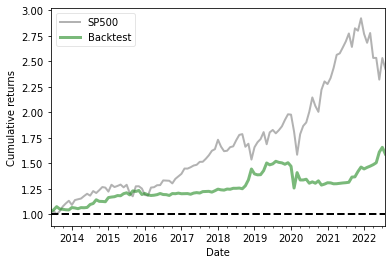

In [29]:
plot_rolling_returns(momentum_12_strategy,
                     factor_returns=sp500,
                     logy=False,
                     legend_loc='best',
                     volatility_match=False)

In [32]:
# 일별이 아닌 month 단위로 rebalancing을 했기 때문에 일부그래프나 지표는 맞지 않음(예) Annual return, Annual Volatility)
pf.create_returns_tear_sheet(momentum_12_strategy)

### 2

In [33]:
# 1
class MyQueue:
    def __init__(self):
        self.queue = []
    def push(self, x: int) -> None:
        self.queue.append(x)
    def pop(self) -> int:
        reversed_new_que = []
        while len(self.queue) > 1:
            reversed_new_que.append(self.queue.pop())
        new_que = []
        num = self.queue.pop()
        while reversed_new_que:
            new_que.append(reversed_new_que.pop())
        self.queue = new_que
        return num
    def peek(self) -> int:
        temp = self.queue.copy()
        while temp:
            num = temp.pop()
        return num
    def empty(self) -> bool:
        return not(len(self.queue) > 0)

In [34]:
# 2
import sys
from collections import deque
class Solution:
    def __init__(self):
        self.stack=deque()
        self.queue=deque()
    def pushCharacter(self,data):
        self.stack.append(data)
    def enqueueCharacter(self,data):
        self.queue.append(data)
    def popCharacter(self):
        return self.stack.pop()
    def dequeueCharacter(self):
        return self.queue.popleft()

In [35]:
# 3
import sys
sys.setrecursionlimit(10000)
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1)+ fibonacci(n-2)

n = int(input())
print(fibonacci(n))

5
5
